In [44]:
%load_ext autoreload
%autoreload 2
import os
import yfinance as yf
import bls

import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
yf.pdr_override()
spy = pdr.get_data_yahoo("SPY", start="2000-01-01")
monthly_spy_pct_change = spy["Adj Close"].resample("M").sum().pct_change().fillna(0)
monthly_spy_pct_change.index = monthly_spy_pct_change.index.to_period("M")
monthly_spy_pct_change

[*********************100%%**********************]  1 of 1 completed
/var/folders/t6/b21psdd94bz02l664k56k2bw0000gn/T/ipykernel_90672/29453687.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_spy_pct_change = spy["Adj Close"].resample("M").sum().pct_change().fillna(0)


Date
2000-01    0.000000
2000-02   -0.025862
2000-03    0.197324
2000-04   -0.162983
2000-05    0.123706
             ...   
2024-01    0.077657
2024-02   -0.005530
2024-03    0.033141
2024-04    0.088542
2024-05   -0.864712
Freq: M, Name: Adj Close, Length: 293, dtype: float64

In [46]:
employment = bls.get_series("CES0000000001",startyear="2000",endyear="2024")
employment.name = "Non-farm Employment"
employment = employment.pct_change()

In [47]:
cpi = bls.get_series("CUUR0000SA0",startyear="2000",endyear="2024")
cpi.name = "CPI"
cpi = cpi.pct_change()

In [48]:
cpi = cpi.fillna(0)
employment = employment.fillna(0)

In [49]:
pd.concat([cpi,employment,monthly_spy_pct_change],axis=1).corr()

,CPI,Non-farm Employment,Adj Close
CPI,1.000000,0.194416,0.043284
Non-farm Employment,0.194416,1.000000,0.039098
Adj Close,0.043284,0.039098,1.000000


<Axes: xlabel='Date'>

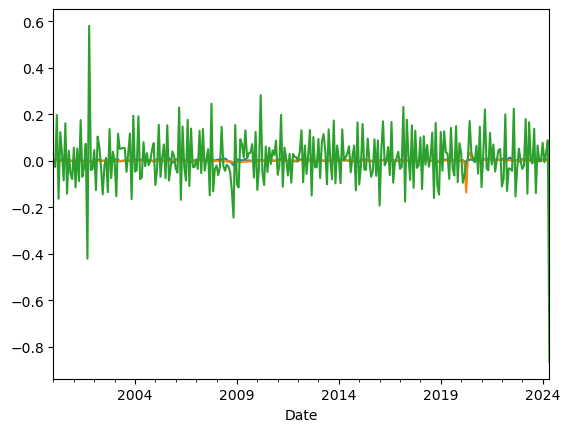

In [51]:
cpi.plot()
employment.plot()
monthly_spy_pct_change.plot()